# Taxicab (tramcar) problem

(From Kevin Murphy: Machine Learning: A Probabalistic Perspective) 

 By Perry Grossman

Using example code and exercise solutions for Think Bayes.

     Copyright 2016 Allen B. Downey

     MIT License: https://opensource.org/licenses/MIT

Exercise 3.10 Taxicab (tramcar) problem
Suppose you arrive in a new city and see a taxi numbered 100. How many taxis are there in this city? Let
us assume taxis are numbered sequentially as integers starting from 0, up to some unknown upper bound
θ. (We number taxis from 0 for simplicity; we can also count from 1 without changing the analysis.) Hence
the likelihood function is p(x) = U(0, θ), the uniform distribution. The goal is to estimate θ. We will use
the Bayesian analysis from Exercise 3.9.  
a. Suppose we see one taxi numbered 100, so D = {100}, m = 100, N = 1. Using an (improper)
non-informative prior on θ of the form p(θ) = P a(θ|0, 0) ∝ 1/θ, what is the posterior p(θ|D)?  
b. Compute the posterior mean, mode and median number of taxis in the city, if such quantities exist.  
c. Rather than trying to compute a point estimate of the number of taxis, we can compute the predictive
density over the next taxicab number using  
p(D
|D, α) = 
p(D
|θ)p(θ|D, α)dθ = p(D
|β) (3.96)  
where α = (b, K)   
are the hyper-parameters,   
β = (c, N + K) 
are the updated hyper-parameters. 
Now
consider the case   
D = {m}, and D = {x}. 
Using Equation 3.95, write down an expression for  
p(x|D, α) (3.97)  

As above, use a non-informative prior b = K = 0.  

d. Use the predictive density formula to compute the probability that the next taxi you will see (say,
the next day) has number 100, 50 or 150, i.e., compute p(x = 100|D, α), p(x = 50|D, α), p(x =
150|D, α).  

e. Briefly describe (1-2 sentences) some ways we might make the model more accurate at prediction.

# Think Bayes: Chapter 3

This notebook presents example code and exercise solutions for Think Bayes.

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT

http://www.greenteapress.com/thinkbayes/html/thinkbayes004.html#sec28

## The train problem



Allen Downey:   
"3.2  The locomotive problem  
I found the locomotive problem in Frederick Mosteller’s, Fifty Challenging Problems in Probability with Solutions (Dover, 1987):

“A railroad numbers its locomotives in order 1..N. One day you see a locomotive with the number 60. Estimate how many locomotives the railroad has.”
Based on this observation, we know the railroad has 60 or more locomotives. But how many more? To apply Bayesian reasoning, we can break this problem into two steps:

What did we know about N before we saw the data?  
For any given value of N, what is the likelihood of seeing the data (a locomotive with number 60)?  
The answer to the first question is the prior.  
The answer to the second is the likelihood."

"Now all we need is a likelihood function. In a hypothetical fleet of N locomotives, what is the probability that we would see number 60? If we assume that there is only one train-operating company (or only one we care about) and that we are equally likely to see any of its locomotives, then the chance of seeing any particular locomotive is 1/N."

PG: (I am using Python3 in Anaconda, on Ubuntu 16.04) 

In [1]:
from __future__ import print_function, division

%matplotlib inline

import thinkplot
from thinkbayes2 import Hist, Pmf, Suite, Cdf

In [3]:
class Train(Suite):
    def Likelihood(self, data, hypo):
        if hypo < data:
            return 0
        else:
            return 1/hypo

Many hypotheses:

Here, Allen Downey has a prior from 1-1001. 

(We could change that.)

In [4]:
hypos = range(1, 1001)
suite = Train(hypos)
suite.Update(60)

0.0028222671142652746

PG: So very low. 0.03% chance of seeing train 60.


PG: I would like to do more to explain why this is different than the chance of seeing that train not just 1 in 1000 (our prior).

In [5]:
1/1000

0.001

Here's what the posterior looks like (we now know there are at least 60 trains)

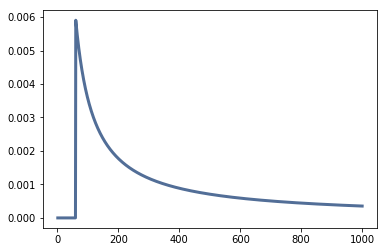

In [6]:
thinkplot.Pdf(suite)

And here's how we can compute the posterior mean

In [7]:
def Mean(suite):
    total = 0
    for hypo, prob in suite.Items():
        total += hypo * prob
    return total

Mean(suite)

333.41989326371095

Or we can just use the method

In [25]:
suite.Mean()

333.41989326371095

## Sensitivity to the prior

Here's a function that solves the train problem for different priors and data

In [8]:
def MakePosterior(high, dataset, constructor=Train):
    """Solves the train problem.
    
    high: int maximum number of trains
    dataset: sequence of observed train numbers
    constructor: function used to construct the Train object
    
    returns: Train object representing the posterior suite
    """
    hypos = range(1, high+1)
    suite = constructor(hypos)

    for data in dataset:
        suite.Update(data)

    return suite

Let's run it with the same dataset and several uniform priors

In [9]:
dataset = [30, 60, 90]

for high in [500, 1000, 2000]:
    suite = MakePosterior(high, dataset)
    print(high, suite.Mean())

500 151.84958795903822
1000 164.30558642273363
2000 171.33818109150937


The results are quite sensitive to the prior, even with several observations.

## Power law prior

Now let's try it with a power law prior.

In [10]:
class Train2(Train):

    def __init__(self, hypos, alpha=1.0):
        Pmf.__init__(self)
        for hypo in hypos:
            self[hypo] = hypo**(-alpha)
        self.Normalize()

Here's what a power law prior looks like, compared to a uniform prior

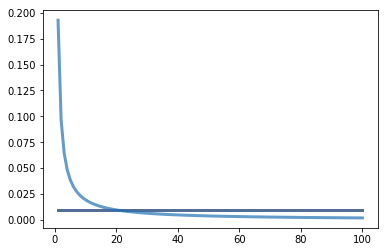

In [11]:
high = 100
hypos = range(1, high+1)
suite1 = Train(hypos)
suite2 = Train2(hypos)
thinkplot.Pdf(suite1)
thinkplot.Pdf(suite2)

Now let's see what the posteriors look like after observing one train.

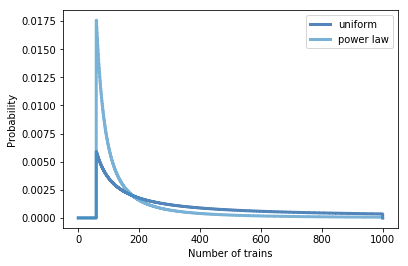

In [12]:
dataset = [60]
high = 1000

thinkplot.PrePlot(num=2)

constructors = [Train, Train2]
labels = ['uniform', 'power law']

for constructor, label in zip(constructors, labels):
    suite = MakePosterior(high, dataset, constructor)
    suite.label = label
    thinkplot.Pmf(suite)

thinkplot.Config(xlabel='Number of trains',
                 ylabel='Probability')

The power law gives less prior probability to high values, which yields lower posterior means, and less sensitivity to the upper bound.

In [13]:
dataset = [30, 60, 90]

for high in [500, 1000, 2000]:
    suite = MakePosterior(high, dataset, Train2)
    print(high, suite.Mean())

500 130.70846986256004
1000 133.2752313750312
2000 133.99746308073065


## Credible intervals

To compute credible intervals, we can use the `Percentile` method on the posterior.

In [15]:
hypos = range(1, 1001)
suite = Train(hypos)
suite.Update(60)

suite.Percentile(5), suite.Percentile(95)

(69, 869)

If you have to compute more than a few percentiles, it is more efficient to compute a CDF.

Also, a CDF can be a better way to visualize distributions.

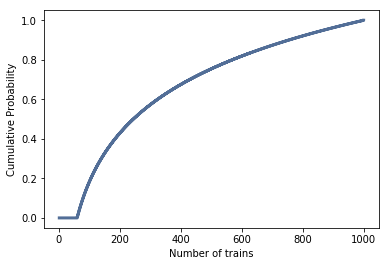

In [16]:
cdf = Cdf(suite)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Number of trains',
                 ylabel='Cumulative Probability',
                 legend=False)

`Cdf` also provides `Percentile`

In [17]:
cdf.Percentile(5), cdf.Percentile(95)

(69, 869)

## PG: So, now let's try to apply the above advice to Exercise 3.10 Taxicab (tramcar) Problem

Exercise 3.10 Taxicab (tramcar) problem
Suppose you arrive in a new city and see a taxi numbered 100. How many taxis are there in this city? Let
us assume taxis are numbered sequentially as integers starting from 0, up to some unknown upper bound
θ. (We number taxis from 0 for simplicity; we can also count from 1 without changing the analysis.) Hence
the likelihood function is   
p(x) = U(0, θ)  
, the uniform distribution. The goal is to estimate θ. We will use
the Bayesian analysis from Exercise 3.9.  

a. Suppose we see one taxi numbered 100, so D = {100}, m = 100, N = 1. Using an (improper)
non-informative prior on θ of the form p(θ) = P a(θ|0, 0) ∝ 1/θ, what is the posterior p(θ|D)?  
b. Compute the posterior mean, mode and median number of taxis in the city, if such quantities exist.  
c. Rather than trying to compute a point estimate of the number of taxis, we can compute the predictive
density over the next taxicab number using  
p(D
|D, α) = 
p(D
|θ)p(θ|D, α)dθ = p(D
|β) (3.96)  
where α = (b, K)   
are the hyper-parameters,   
β = (c, N + K) 
are the updated hyper-parameters. 
Now
consider the case   
D = {m}, and D = {x}.   
Using Equation 3.95, write down an expression for  
p(x|D, α) (3.97)  

As above, use a non-informative prior b = K = 0.  

d. Use the predictive density formula to compute the probability that the next taxi you will see (say,
the next day) has number 100, 50 or 150, i.e., compute p(x = 100|D, α), p(x = 50|D, α), p(x =
150|D, α).  

e. Briefly describe (1-2 sentences) some ways we might make the model more accurate at prediction.

#### Use Allen Downey's Code, but use:
Taxi numbered 100

I am not sure what to use for a range, given the question indicates and "unknown upper bound θ."  
1000 might be good; but perhaps it should be larger?  
What would be a reasonable assumption for one taxi company?

##### a. what is the posterior p(θ|D)? 

In [18]:
hypos = range(1, 1001)
suite = Train(hypos)
suite.Update(100)

0.002308093342910722

Here's what the posterior looks like (we now know there are at least 100 taxis)

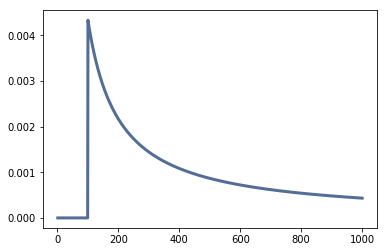

In [20]:
thinkplot.Pdf(suite)


##### b. Compute the posterior mean, mode and median number of taxis in the city, if such quantities exist.

And here's how we can compute the posterior mean

In [21]:
def Mean(suite):
    total = 0
    for hypo, prob in suite.Items():
        total += hypo * prob
    return total

Mean(suite)

390.36549486502236

Or we can just use the method

In [22]:
suite.Mean()

390.36549486502236

In [29]:
# Here is the mode (remember, we only have one observation, so far)
suite.Mode()

100

In [30]:
# Here is the median (remember, we only have one observation, so far)
suite.Median()

181

It is much less than the mean, and like the power law distribution, it helps reduce emphasis on the larger numbers.

## Sensitivity to the prior

Here's a function that solves the problem for different priors and data

In [31]:
def MakePosterior(high, dataset, constructor=Train):
    """Solves the train problem.
    
    high: int maximum number of trains
    dataset: sequence of observed train numbers
    constructor: function used to construct the Train object
    
    returns: Train object representing the posterior suite
    """
    hypos = range(1, high+1)
    suite = constructor(hypos)

    for data in dataset:
        suite.Update(data)

    return suite

Let's run it with the same dataset and several uniform priors

In [32]:
dataset = [30, 60, 100]

for high in [500, 1000, 2000]:
    suite = MakePosterior(high, dataset)
    print(high, suite.Mean())

500 166.00179373567858
1000 181.00247099173168
2000 189.5743102151601


The results are quite sensitive to the prior, even with several observations.

## Power law prior

Now let's try it with a power law prior.

In [25]:
class Train2(Train):

    def __init__(self, hypos, alpha=1.0):
        Pmf.__init__(self)
        for hypo in hypos:
            self[hypo] = hypo**(-alpha)
        self.Normalize()

Here's what a power law prior looks like, compared to a uniform prior

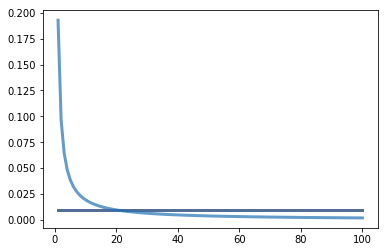

In [26]:
high = 100
hypos = range(1, high+1)
suite1 = Train(hypos)
suite2 = Train2(hypos)
thinkplot.Pdf(suite1)
thinkplot.Pdf(suite2)

PG: I am not sure what the horizontal line is and why the plot runs below it.

Now let's see what the posteriors look like after observing one taxi.

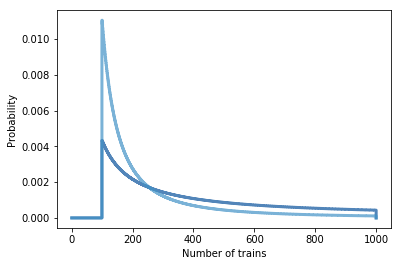

In [27]:
dataset = [100]
high = 1000

thinkplot.PrePlot(num=2)

constructors = [Train, Train2]
labels = ['uniform', 'power law']

for constructor, label in zip(constructors, labels):
    suite = MakePosterior(high, dataset, constructor)
    suite.label = label
    thinkplot.Pmf(suite)

thinkplot.Config(xlabel='Number of trains',
                 ylabel='Probability')

The power law gives less prior probability to high values, which yields lower posterior means, and less sensitivity to the upper bound.

In [13]:
dataset = [30, 60, 90]

for high in [500, 1000, 2000]:
    suite = MakePosterior(high, dataset, Train2)
    print(high, suite.Mean())

500 130.70846986256004
1000 133.2752313750312
2000 133.99746308073065


## Credible intervals

To compute credible intervals, we can use the `Percentile` method on the posterior.

In [15]:
hypos = range(1, 1001)
suite = Train(hypos)
suite.Update(60)

suite.Percentile(5), suite.Percentile(95)

(69, 869)

If you have to compute more than a few percentiles, it is more efficient to compute a CDF.

Also, a CDF can be a better way to visualize distributions.

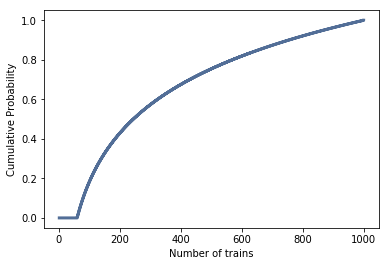

In [16]:
cdf = Cdf(suite)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Number of trains',
                 ylabel='Cumulative Probability',
                 legend=False)

`Cdf` also provides `Percentile`

In [17]:
cdf.Percentile(5), cdf.Percentile(95)

(69, 869)

##### c. Rather than trying to compute a point estimate of the number of taxis, we can compute the predictive density over   the next taxicab number using
p(D |D, α) =  p(D |θ)p(θ|D, α)dθ = p(D |β) (3.96)  
where α = (b, K)
are the hyper-parameters,  
β = (c, N + K) are the updated hyper-parameters.     

Now consider the case  
D = {m}, and D = {x}.
Using Equation 3.95, write down an expression for  
p(x|D, α) (3.97)

As above, use a non-informative prior b = K = 0.


PG: I'm sure the CDF, above, and the use of a few samples, above, help with this; but I am not sure how to apply them.

##### d. Use the predictive density formula to compute the probability that the next taxi you will see (say, the next day) has number 100, 50 or 150, i.e., compute   
p(x = 100|D, α), p(x = 50|D, α), p(x = 150|D, α).


First off, I think we need to consider whether we do this with or without replacement.  
It must be with replacement, since they list 100 again.  

But I am not sure how to code this up.--- For further review.

I think it is more than just repeating what was done at the beginning, but with different numbers:

In [35]:
hypos = range(1, 1001)
suite = Train(hypos)
suite.Update(100)

0.002308093342910722

In [36]:
hypos = range(1, 1001)
suite = Train(hypos)
suite.Update(50)

0.003006265522220921

In [37]:
hypos = range(1, 1001)
suite = Train(hypos)
suite.Update(150)

0.0019009569385731312

##### e. Briefly describe (1-2 sentences) some ways we might make the model more accurate at prediction.

Well, it seems that the power law distribution may be more accurate, reducing the focus on high values.

Also, taking more samples, as shown above, seems to be more helpful, also reducing the extreme values.

There may be other ways to make the model more accurate.

## Exercises

**Exercise:** To write a likelihood function for the locomotive problem, we had
to answer this question:  "If the railroad has `N` locomotives, what
is the probability that we see number 60?"

The answer depends on what sampling process we use when we observe the
locomotive.  In the book, I resolved the ambiguity by specifying
that there is only one train-operating company (or only one that we
care about).

But suppose instead that there are many companies with different
numbers of trains.  And suppose that you are equally likely to see any
train operated by any company.
In that case, the likelihood function is different because you
are more likely to see a train operated by a large company.

As an exercise, implement the likelihood function for this variation
of the locomotive problem, and compare the results.

In [19]:
# Solution

# Suppose Company A has N trains and all other companies have M.
# The chance that we would observe one of Company A's trains is $N/(N+M)$.
# Given that we observe one of Company A's trains, the chance that we
# observe number 60 is $1/N$ for $N \ge 60$.

# The product of these probabilities is $1/(N+M)$, which is just the
# probability of observing any given train.

# If N<<M, this converges to a constant, which means that all value of $N$
# have the same likelihood, so we learn nothing about how many trains
# Company A has.

# If N>>M, this converges to $1/N$, which is what we saw in the previous
# solution.

# More generally, if M is unknown, we would need a prior distribution for
# M, then we can do a two-dimensional update, and then extract the posterior
# distribution for N.

# We'll see how to do that soon.